<a href="https://colab.research.google.com/github/christianbusalanan/FinMark-Predictive-Analytics/blob/main/MO_IT134_Homework_Week_3_Homework_Project_Dataset_Preprocessing_and_Feature_Engineering_BSIT_S3101_Busalanan%2C_C_N_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Welcome to FinMark Solutions**

At FinMark Corporaton, we specialize in offering a wide range of services designed to empower businesses with the insights and strategies needed to succeed in today's competitive market. Our core services include financial analysis, marketing analytics, and business intelligence. We are dedicated to serving small and medium enterprises (SMEs) across Southeast Asia, helping them optimize their marketing strategies and financial planning through advanced data analytics.

**Problem Statement:** FinMark Corporation uses manual methods for sales forecasting and analysis and customer segmentation. As the company grows, this approach can’t keep up with the increasing data, causing delays and missed opportunities.

**Project Deliverables:** As their data analyst, the company wants you, to automate these processes using machine learning and predictive analytics to improve efficiency and adapt quickly to market changes.

##**CUSTOMER DATA**

In [1]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

1. Load Datasets

In [2]:
customers = pd.read_csv('customers_data.csv')
products = pd.read_csv('products_data.csv')
transactions = pd.read_csv('transactions_data.csv')

2. Preprocess Customer Data

In [3]:
# Fill missing values in Company_Profit with median
customers["Company_Profit"].fillna(customers["Company_Profit"].median(), inplace=True)

<ipython-input-3-582c5b4049a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers["Company_Profit"].fillna(customers["Company_Profit"].median(), inplace=True)


In [4]:
# Extract city from the Address column
customers['Address'] = customers['Address'].str.split(',').str[2].str.strip().str.upper()

In [5]:
#Imputing missing company ID
company_id=[]
for i in range(1, len(customers)+1):
  company_id.append(i)

customers['Company_ID']= company_id

In [6]:
customers.head()

,Company_ID,Company_Name,Company_Profit,Address
0,1,Tech Enterprises 1,80701.0,PASIG
1,2,Global Partners 2,80511.0,TAGUIG
2,3,Quantum Associates 3,110664.0,PASIG
3,4,Prime Network 4,75301.5,TAGUIG
4,5,Elite Ventures 5,69427.0,MAKATI


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_ID      100 non-null    int64  
 1   Company_Name    100 non-null    object 
 2   Company_Profit  100 non-null    float64
 3   Address         100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


##**PRODUCTS DATA**

3. Preprocess Products Data

In [8]:
#Imputing missing product ID
product_id= []
for i in range(1, len(products)+1):
  product_id.append(i)

products['Product_ID']= product_id

In [9]:
# Clean and convert Product_Price to integer
products['Product_Price'] = products['Product_Price'].str.replace('?', '').str.replace(',', '').astype(int)

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     20 non-null     int64 
 1   Product_Name   20 non-null     object
 2   Product_Price  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


In [11]:
products.head()

,Product_ID,Product_Name,Product_Price
0,1,FinPredictor Suite,140000
1,2,MarketMinder Analytics,168000
2,3,TrendWise Forecaster,100800
3,4,CustomerScope Insights,123200
4,5,SalesSync Optimizer,84000


##**TRANSACTION DATA**

4. Preprocess Transaction Data

In [12]:
transactions.head()

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0


In [13]:
# Drop unnecessary columns
transactions.drop(columns=['Unnamed: 0', 'Transaction_ID'], inplace=True)

In [14]:
# Merge transactions with customers and products data
df = transactions.merge(products, on='Product_ID').merge(customers, on='Company_ID')

In [15]:
# Keep only relevant columns
df= df[['Transaction_Date','Company_Name', 'Product_Name', 'Address', 'Product_Price_y', 'Quantity', 'Total_Cost']]

In [16]:
# Convert Transaction_Date to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format= 'mixed')
# Extract time-based features
df['Month'] = df['Transaction_Date'].dt.month
df['Day'] = df['Transaction_Date'].dt.day
df['Year'] = df['Transaction_Date'].dt.year

In [17]:
# Fill missing Total_Cost values based on Quantity * Product_Price
df['Total_Cost'] = df['Total_Cost'].fillna(df['Product_Price_y'] * df['Quantity'])

In [18]:
# Recalculate Quantity where necessary
df['Quantity'] = df['Total_Cost'] / df['Product_Price_y']

In [19]:
# Drop redundant columns
df.drop(columns=['Transaction_Date'], inplace=True)

In [20]:
# Remove rows with missing Quantity or Total_Cost
df.dropna(subset=['Quantity', 'Total_Cost'], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8008 entries, 0 to 8092
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company_Name     8008 non-null   object 
 1   Product_Name     8008 non-null   object 
 2   Address          8008 non-null   object 
 3   Product_Price_y  8008 non-null   int64  
 4   Quantity         8008 non-null   float64
 5   Total_Cost       8008 non-null   float64
 6   Month            8008 non-null   int32  
 7   Day              8008 non-null   int32  
 8   Year             8008 non-null   int32  
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 531.8+ KB


In [22]:
df.head()

,Company_Name,Product_Name,Address,Product_Price_y,Quantity,Total_Cost,Month,Day,Year
0,Elite Consulting 88,RevenueVue Dashboard,TAGUIG,179200,6.0,1075200.0,3,26,2024
1,Sky Industries 29,EcoNomix Modeler,MAKATI,95200,15.0,1428000.0,7,9,2024
2,Global Holdings 28,DashSync Analytics Hub,TAGUIG,134400,7.0,940800.0,4,13,2024
3,Green Ventures 85,BudgetMaster Pro,CEBU CITY,84000,12.0,1008000.0,9,6,2023
4,Green Industries 47,TrendWise Forecaster,MANDALUYONG,100800,7.0,705600.0,7,6,2021


## Predictive Analytics

5. Encode Categorical Features

In [23]:
# Label Encoding Company Name and Product Name
label_encoder = LabelEncoder()
df["Company_Name"] = label_encoder.fit_transform(df["Company_Name"])
df["Product_Name"] = label_encoder.fit_transform(df["Product_Name"])

In [24]:
# One-hot encoding for Address
df = pd.get_dummies(df, columns=["Address"], drop_first=True, dtype=int)

In [25]:
df.head()

,Company_Name,Product_Name,Product_Price_y,Quantity,Total_Cost,Month,Day,Year,Address_CEBU CITY,Address_DAVAO CITY,Address_MAKATI,Address_MANDALUYONG,Address_MANILA,Address_PARAÑAQUE,Address_PASIG,Address_QUEZON CITY,Address_TAGUIG
0,9,14,179200,6.0,1075200.0,3,26,2024,0,0,0,0,0,0,0,0,1
1,77,4,95200,15.0,1428000.0,7,9,2024,0,0,1,0,0,0,0,0,0
2,19,2,134400,7.0,940800.0,4,13,2024,0,0,0,0,0,0,0,0,1
3,35,0,84000,12.0,1008000.0,9,6,2023,1,0,0,0,0,0,0,0,0
4,28,19,100800,7.0,705600.0,7,6,2021,0,0,0,1,0,0,0,0,0


6. Train Machine Learning Model

In [26]:
# Define features (X) and target (y)
X = df.drop(columns=["Product_Name"])
y = df["Product_Name"]

In [27]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [30]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7952559300873908


7. Predict Using Manual Input

In [31]:
# Example manual input: Predict what Tech Enterprises 1 would likely purchase
manual_input = [[1, 100000, 10, 1000000, 3, 30, 2025, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
predicted_product = model.predict(manual_input)

print("Predicted Product:", predicted_product)

Predicted Product: [6]


Predicting what Tech Enterprises 1 would likely purchase with 10 quantities and total budget of 1,000,000 on March 30, 2025 would give us RevenueVue Dashboard

## Time Series Analysis

8. Preprocess data

In [32]:
# Merge transactions with customers and products data
transactions = transactions.merge(products, on='Product_ID').merge(customers, on='Company_ID')

# Fill missing Total_Cost values based on Quantity * Product_Price
transactions['Total_Cost'] = transactions['Total_Cost'].fillna(transactions['Product_Price_y'] * transactions['Quantity'])

# Recalculate Quantity where necessary
transactions['Quantity'] = transactions['Total_Cost'] / transactions['Product_Price_y']

# Keep only relevant columns
transactions= transactions[['Transaction_Date', 'Total_Cost']]

In [33]:
# Converting to date datatype
transactions['Transaction_Date']= pd.to_datetime(transactions['Transaction_Date'], format= 'mixed')
transactions= transactions.set_index('Transaction_Date')

In [34]:
# Dropping null values
transactions.dropna(subset= ['Total_Cost'], inplace= True)

#Sorting data
transactions= transactions.sort_index()

9. Plot data

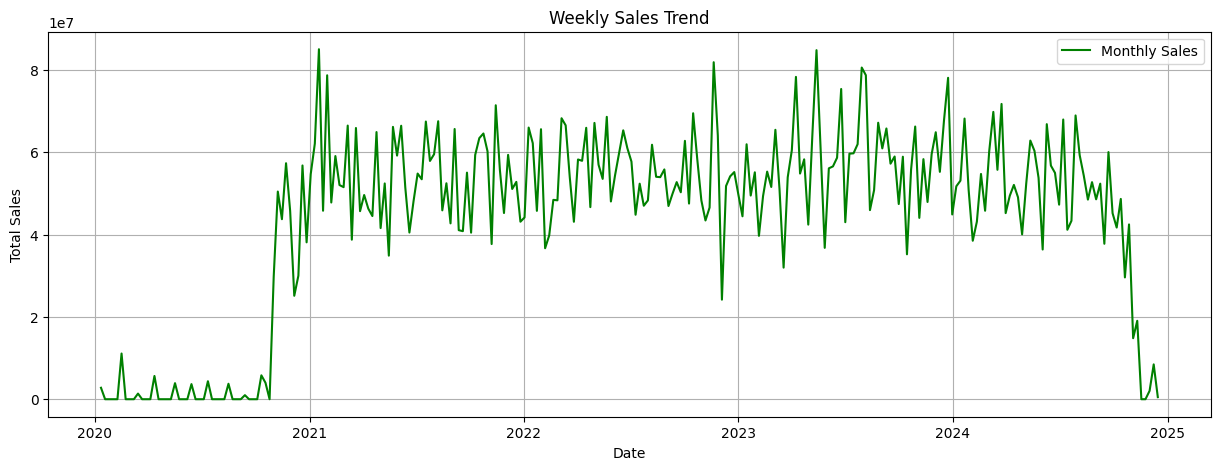

In [35]:
# Plotting the monthly sales
df_weekly = transactions.resample("W")["Total_Cost"].sum()
plt.figure(figsize= (15,5))
sns.lineplot(data= df_weekly, color="g", label="Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Weekly Sales Trend")
plt.grid(True)
plt.legend()
plt.show()

In [36]:
# Making required columns ("ds", "y")
transactions['ds']= transactions.index
transactions['y']= transactions['Total_Cost']
transactions= transactions[['ds', 'y']]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeb0w9c2p/v9bdygcl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeb0w9c2p/luyvvl0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53820', 'data', 'file=/tmp/tmpeb0w9c2p/v9bdygcl.json', 'init=/tmp/tmpeb0w9c2p/luyvvl0j.json', 'output', 'file=/tmp/tmpeb0w9c2p/prophet_model86kjj6id/prophet_model-20250312075504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


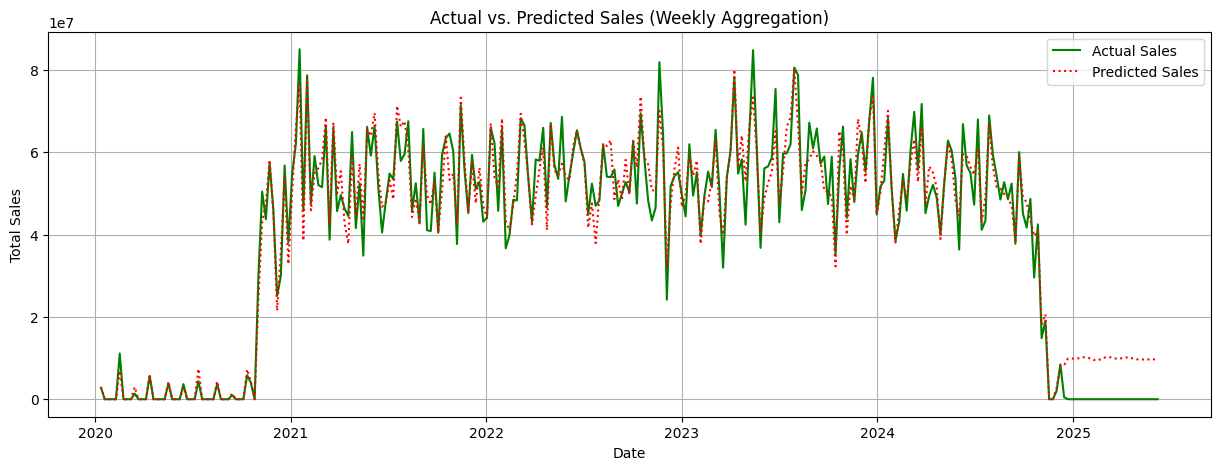

In [39]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(transactions)

# Create future dates (next 6 months)
future_dates = model.make_future_dataframe(periods=180, freq='D')

# Predict future sales
forecast = model.predict(future_dates)

# Merge actual and predicted data for easy plotting
forecast = forecast[["ds", "yhat"]].rename(columns={"yhat": "Predicted_Total_Cost"})
full_df = transactions.merge(forecast, on="ds", how="outer")

# Resample to weekly
full_df.set_index("ds", inplace=True)
df_weekly = full_df.resample("W").sum()

# Plot actual vs predicted sales
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_weekly, x=df_weekly.index, y="y", label="Actual Sales", color="green")
sns.lineplot(data=df_weekly, x=df_weekly.index, y="Predicted_Total_Cost", label="Predicted Sales", color="red", linestyle="dotted")

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Actual vs. Predicted Sales (Weekly Aggregation)")
plt.legend()
plt.grid(True)
plt.show()

The model predicts after the steep decline, predicted sales show an upward trend, but actual sales remain flat.